# Variant Analysis
Author: Nathaly Keith

Objective: Parse a VCF-like file, filter variants and produce summaries and plots by chromosome.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
from io import StringIO
import pandas as pd

vcf_data = """#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO
1\t12345\t.\tA\tG\t60\tPASS\tAF=0.1
1\t67890\t.\tC\tT\t50\tPASS\tAF=0.3
2\t23456\t.\tG\tA\t20\tq10\tAF=0.05
2\t78901\t.\tT\tC\t80\tPASS\tAF=0.2
3\t34567\t.\tA\tC\t10\tq10\tAF=0.15
3\t89012\t.\tC\tG\t70\tPASS\tAF=0.25
"""

vcf_df = pd.read_csv(StringIO(vcf_data), sep='\t')  # sem comment='#'
vcf_df['AF'] = vcf_df['INFO'].str.extract(r'AF=([0-9.]+)').astype(float)
vcf_df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,AF
0,1,12345,.,A,G,60,PASS,AF=0.1,0.10
1,1,67890,.,C,T,50,PASS,AF=0.3,0.30
2,2,23456,.,G,A,20,q10,AF=0.05,0.05
3,2,78901,.,T,C,80,PASS,AF=0.2,0.20
4,3,34567,.,A,C,10,q10,AF=0.15,0.15
5,3,89012,.,C,G,70,PASS,AF=0.25,0.25


## Filtering strategy
We will filter by PASS in FILTER column, QUAL >= 30 and AF >= 0.05

In [3]:
filtered = vcf_df[(vcf_df['FILTER']=='PASS') & (vcf_df['QUAL']>=30) & (vcf_df['AF']>=0.05)].copy()
filtered

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,AF
0,1,12345,.,A,G,60,PASS,AF=0.1,0.10
1,1,67890,.,C,T,50,PASS,AF=0.3,0.30
3,2,78901,.,T,C,80,PASS,AF=0.2,0.20
5,3,89012,.,C,G,70,PASS,AF=0.25,0.25


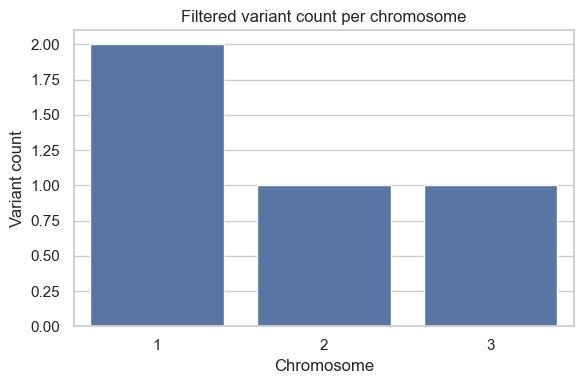

In [4]:
counts = filtered['#CHROM'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index.astype(str), y=counts.values)
plt.xlabel('Chromosome')
plt.ylabel('Variant count')
plt.title('Filtered variant count per chromosome')
plt.tight_layout()

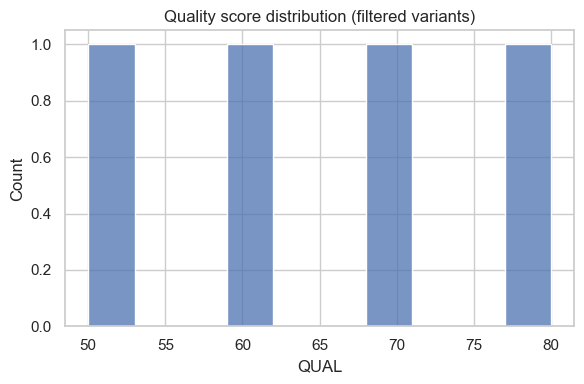

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(filtered['QUAL'], bins=10)
plt.title('Quality score distribution (filtered variants)')
plt.xlabel('QUAL')
plt.tight_layout()

## Export
You can export filtered variants to CSV:

In [6]:
filtered.to_csv('Variant-Analysis/filtered_variants.csv', index=False)
print("Exported filtered_variants.csv")

Exported filtered_variants.csv
